In [22]:
# Water Quality Prediction using Neural Networks


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [24]:
from io import StringIO

csv_data = StringIO("""ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
6.7,204.89,20791.3,7.3,368.5,564.3,10.2,66.4,3.9,0
7.0,129.0,18630.1,6.5,310.1,592.4,11.3,60.1,4.2,1
8.1,224.0,19909.2,8.2,356.0,624.0,10.5,75.0,3.7,0
6.5,188.0,35658.0,9.1,400.0,500.1,10.8,72.5,4.0,0
7.2,220.0,34186.0,7.4,390.0,610.9,12.1,65.2,4.1,1""")

df = pd.read_csv(csv_data)
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.7,204.89,20791.3,7.3,368.5,564.3,10.2,66.4,3.9,0
1,7.0,129.00,18630.1,6.5,310.1,592.4,11.3,60.1,4.2,1
2,8.1,224.00,19909.2,8.2,356.0,624.0,10.5,75.0,3.7,0
3,6.5,188.00,35658.0,9.1,400.0,500.1,10.8,72.5,4.0,0
4,7.2,220.00,34186.0,7.4,390.0,610.9,12.1,65.2,4.1,1


In [25]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


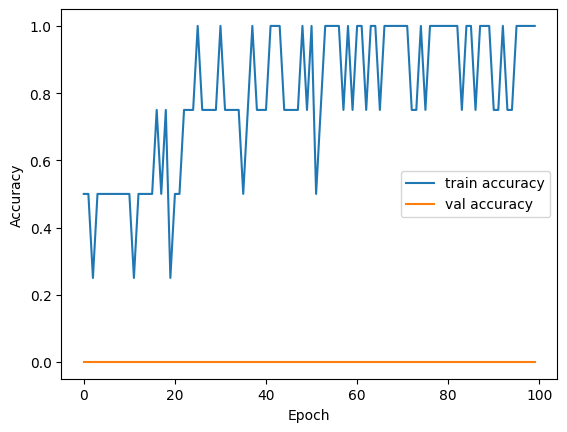

In [28]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [29]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))



1/1 [==============================] - 0s 48ms/step
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

